In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('temperature.csv')
data.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [3]:
data.shape

(7752, 25)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [5]:
for i in data.columns:
    if data[i].dtypes=='float64':
        data[i]=data[i].fillna(data[i].mean())

In [6]:
data.isna().sum()

station             0
Date                2
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [7]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()

In [8]:
data['Date']=oe.fit_transform(data['Date'].values.reshape(-1,1))

In [9]:
data['Date'].fillna(data['Date'].mean(),inplace=True)

In [10]:
data.describe()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,...,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000
mean,13.000000,154.500000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.210637,89.483053,2.956557,2.403036,14.596973,7.157124,2.932898,2.333973,2.173245,33.567001,...,1.754258,1.156174,1.200364,0.050352,0.079435,54.279780,1.370444,429.158867,3.122557,2.483276
min,1.000000,0.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,77.000000,27.800000,21.700000,46.046162,84.316923,27.693091,22.114651,5.686487,37.532764,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.400000
50%,13.000000,154.500000,29.900000,23.400000,55.313244,89.699505,29.662273,23.735942,6.563068,57.310630,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,232.000000,32.000000,24.900000,67.038254,93.704500,31.683819,25.134000,8.007471,83.904586,...,0.024276,0.009697,0.000693,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,309.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


In [11]:
data.isna().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

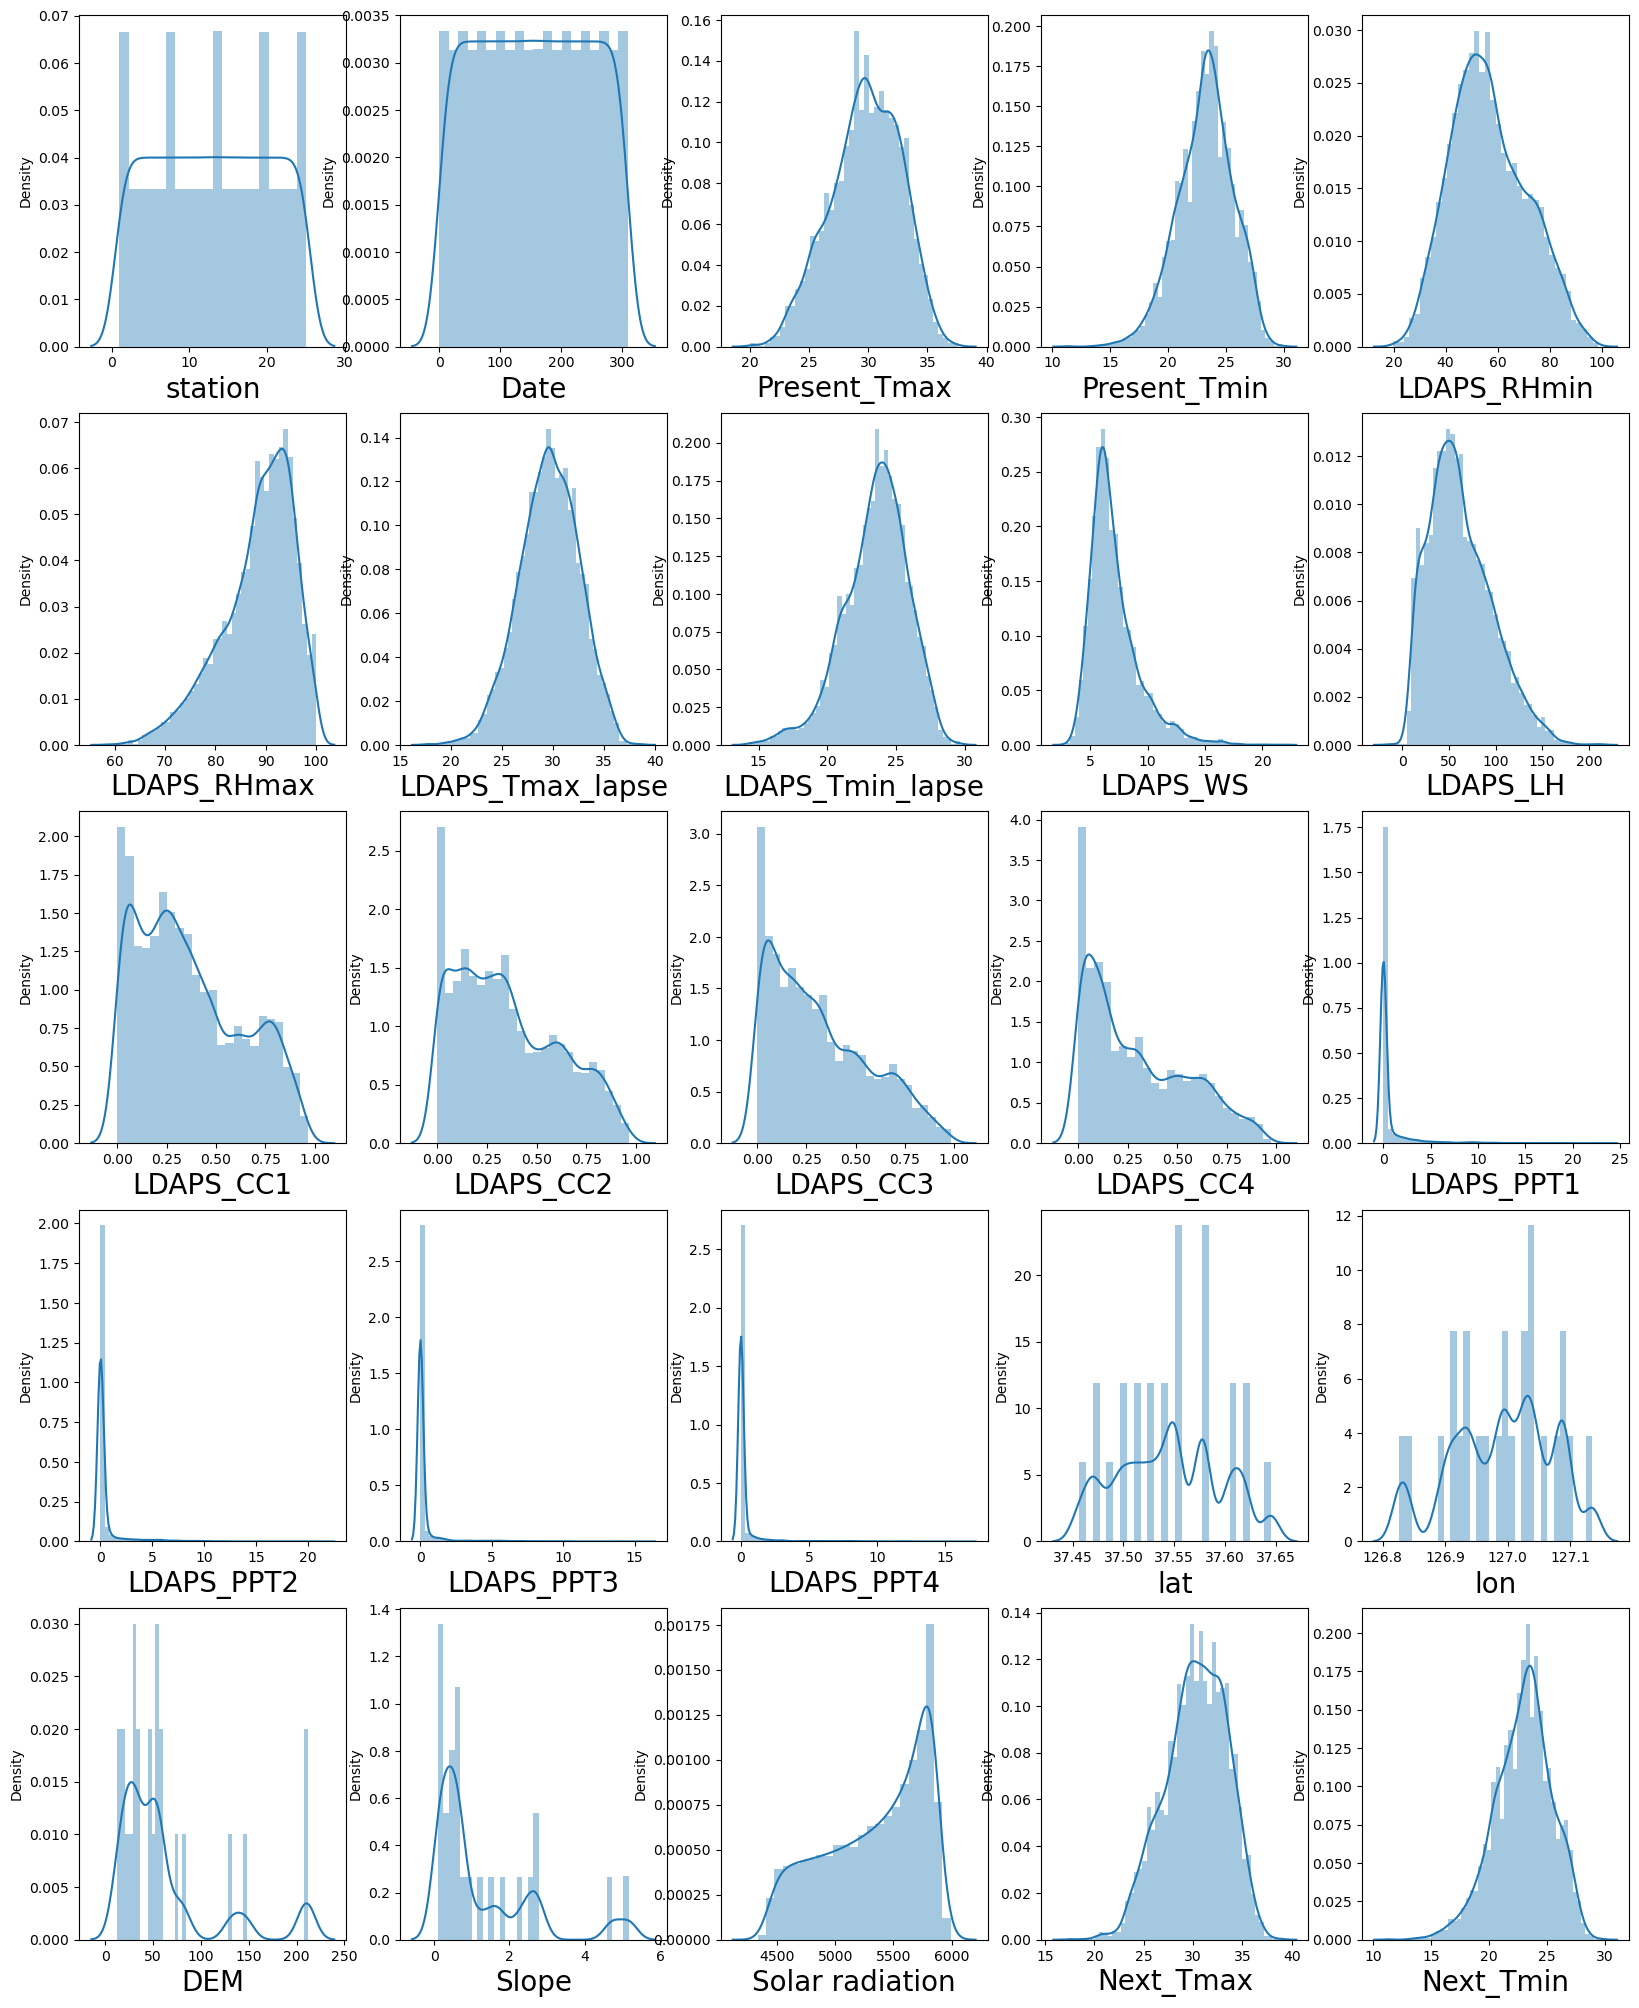

In [13]:
plt.figure(figsize=(20,25),facecolor='w')
plot=1
for col in data.columns:
    if plot<=25:
        ax=plt.subplot(5,5,plot)
        sns.distplot(data[col])
        plt.xlabel(col,fontsize=20)
    plot+=1
plt.show()

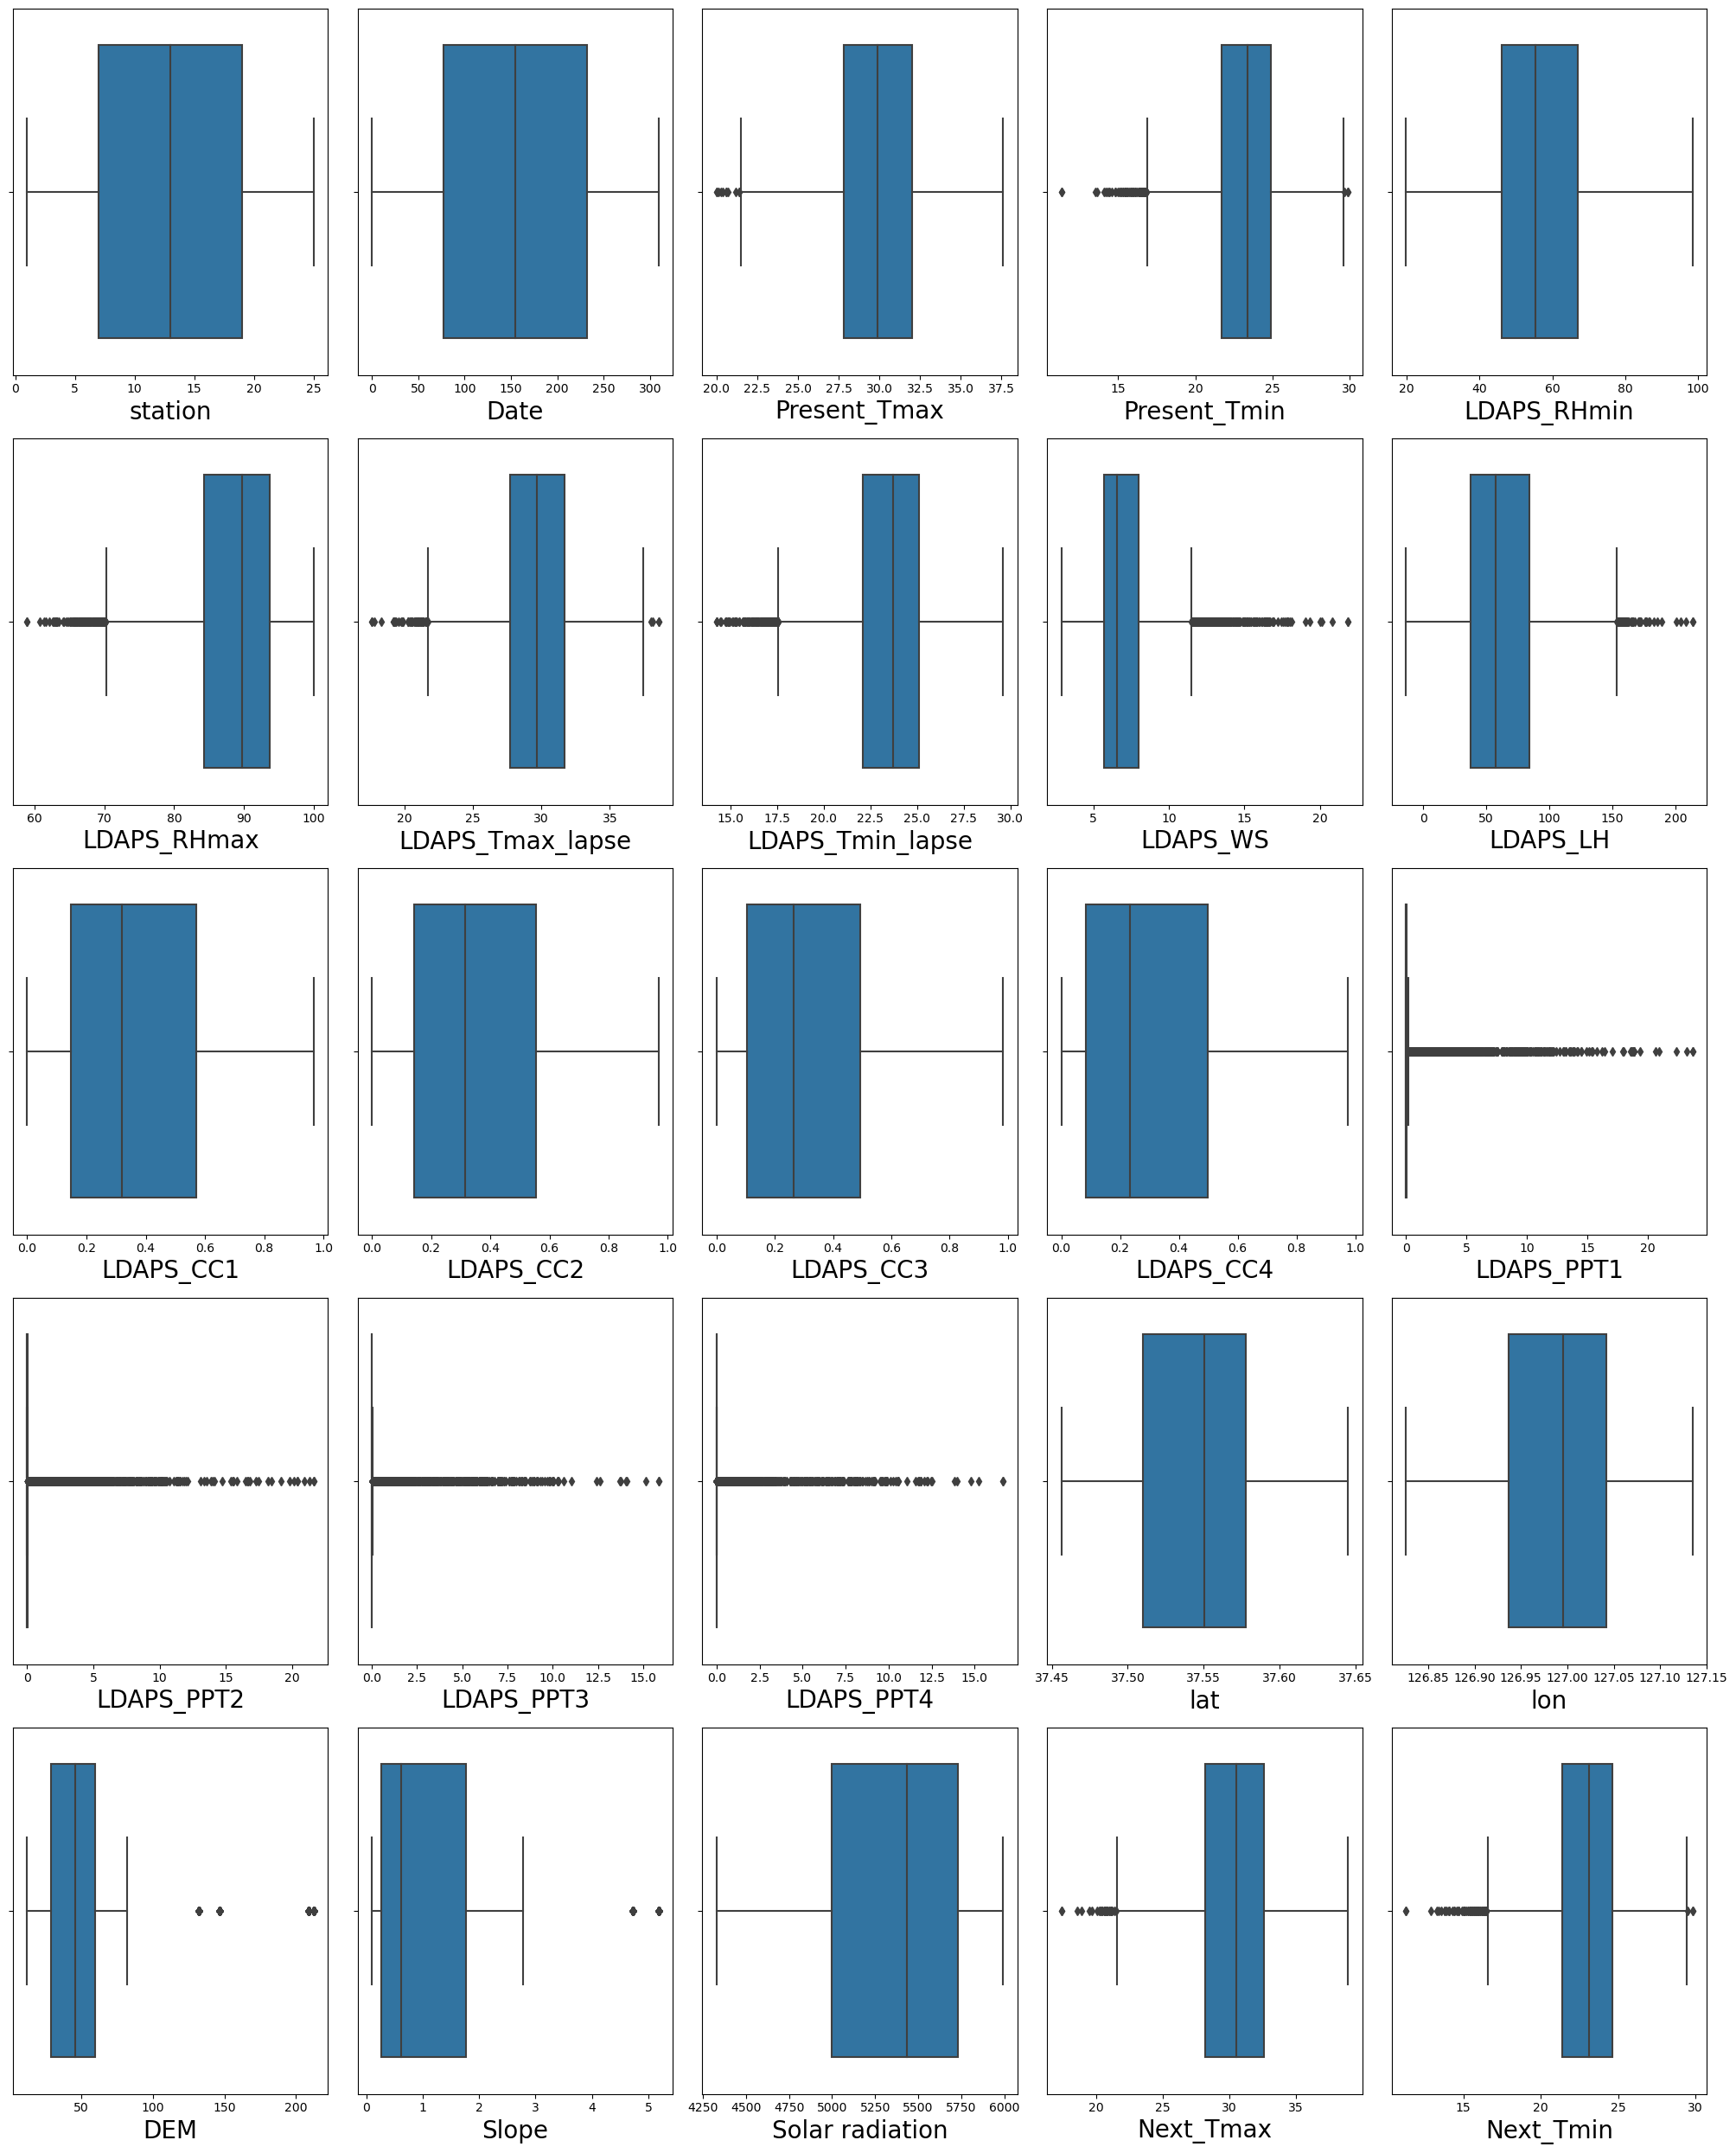

In [14]:
plt.figure(figsize=(20,25))
plot=1
for i in data.columns:
    if plot<=25:
        ax=plt.subplot(5,5,plot)
        sns.boxplot(data[i])
        plt.xlabel(i,fontsize=20)
    plot+=1
plt.tight_layout()

In [23]:
data.skew()

station             0.000000
Date                0.000000
Present_Tmax       -0.264137
Present_Tmin       -0.367538
LDAPS_RHmin         0.300220
LDAPS_RHmax        -0.855015
LDAPS_Tmax_lapse   -0.227880
LDAPS_Tmin_lapse   -0.581763
LDAPS_WS            1.579236
LDAPS_LH            0.673757
LDAPS_CC1           0.459458
LDAPS_CC2           0.472350
LDAPS_CC3           0.640735
LDAPS_CC4           0.666482
LDAPS_PPT1          5.393821
LDAPS_PPT2          5.775355
LDAPS_PPT3          6.457129
LDAPS_PPT4          6.825464
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.340200
Next_Tmin          -0.404447
dtype: float64

In [16]:
q3=data.quantile(.75)
q1=data.quantile(.25)
iqr=q3-q1
iqr

station              12.000000
Date                155.000000
Present_Tmax          4.200000
Present_Tmin          3.200000
LDAPS_RHmin          20.992092
LDAPS_RHmax           9.387577
LDAPS_Tmax_lapse      3.990727
LDAPS_Tmin_lapse      3.019349
LDAPS_WS              2.320984
LDAPS_LH             46.371822
LDAPS_CC1             0.423375
LDAPS_CC2             0.412635
LDAPS_CC3             0.390907
LDAPS_CC4             0.414489
LDAPS_PPT1            0.067593
LDAPS_PPT2            0.024276
LDAPS_PPT3            0.009697
LDAPS_PPT4            0.000693
lat                   0.067400
lon                   0.105000
DEM                  31.132400
Slope                 1.496500
Solar radiation     729.297851
Next_Tmax             4.400000
Next_Tmin             3.200000
dtype: float64

In [30]:
pt_l=q3.Present_Tmax-(1.5*iqr.Present_Tmax)
ind_num=np.where(pt_l>data['Present_Tmax'])
data=data.drop(data.index[ind_num])
data.reset_index()
data.shape

(6915, 25)

In [31]:
ptm_l=q3.Present_Tmin-(1.5*iqr.Present_Tmin)
ind_num=np.where(ptm_l>data['Present_Tmin'])
data=data.drop(data.index[ind_num])
data.reset_index()
data.shape

(6464, 25)

In [35]:
pt_h=q3.Present_Tmin+(1.5*iqr.Present_Tmin)
ind_num=np.where(pt_h<data['Present_Tmin'])
data=data.drop(data.index[ind_num])
data.reset_index()
data.shape

(6461, 25)

In [36]:
lrmax_l=q3.LDAPS_RHmax-(1.5*iqr.LDAPS_RHmax)
ind_num=np.where(lrmax_l>data['LDAPS_RHmax'])
data=data.drop(data.index[ind_num])
data.reset_index()
data.shape

(5608, 25)

In [37]:
LDAPS_WS_h=q3.LDAPS_WS+(1.5*iqr.LDAPS_WS)
ind_num=np.where(LDAPS_WS_h<data['LDAPS_WS'])
data=data.drop(data.index[ind_num])
data.reset_index()
data.shape

(5360, 25)

In [38]:
LDAPS_PPT1_h=q3.LDAPS_PPT1+(1.5*iqr.LDAPS_PPT1)
ind_num=np.where(LDAPS_PPT1_h<data['LDAPS_PPT1'])
data=data.drop(data.index[ind_num])
data.reset_index()
data.shape

(4216, 25)

In [39]:
ltmax_l=q3.LDAPS_Tmax_lapse-(1.5*iqr.LDAPS_Tmax_lapse)
ind_num=np.where(ltmax_l>data['LDAPS_Tmax_lapse'])
data=data.drop(data.index[ind_num])
data.reset_index()
data.shape

(4060, 25)

In [40]:
ltmax_h=q3.LDAPS_Tmax_lapse+(1.5*iqr.LDAPS_Tmax_lapse)
ind_num=np.where(ltmax_h<data['LDAPS_Tmax_lapse'])
data=data.drop(data.index[ind_num])
data.reset_index()
data.shape

(4060, 25)

In [41]:
ltmin_l=q3.LDAPS_Tmin_lapse-(1.5*iqr.LDAPS_Tmin_lapse)
ind_num=np.where(ltmin_l>data['LDAPS_Tmin_lapse'])
data=data.drop(data.index[ind_num])
data.reset_index()
data.shape

(3918, 25)

In [42]:
ll_h=q3.LDAPS_LH+(1.5*iqr.LDAPS_LH)
ind_num=np.where(ll_h<data['LDAPS_LH'])
data=data.drop(data.index[ind_num])
data.reset_index()
data.shape

(3882, 25)

In [43]:
LDAPS_PPT2_h=q3.LDAPS_PPT2+(1.5*iqr.LDAPS_PPT2)
ind_num=np.where(LDAPS_PPT2_h<data['LDAPS_PPT2'])
data=data.drop(data.index[ind_num])
data.reset_index()
data.shape

(3384, 25)

In [44]:
LDAPS_PPT3_h=q3.LDAPS_PPT3+(1.5*iqr.LDAPS_PPT3)
ind_num=np.where(LDAPS_PPT3_h<data['LDAPS_PPT3'])
data=data.drop(data.index[ind_num])
data.reset_index()
data.shape

(3004, 25)

In [45]:
LDAPS_PPT4_h=q3.LDAPS_PPT4+(1.5*iqr.LDAPS_PPT4)
ind_num=np.where(LDAPS_PPT4_h<data['LDAPS_PPT4'])
data=data.drop(data.index[ind_num])
data.reset_index()
data.shape

(2668, 25)

In [46]:
DEM_h=q3.DEM+(1.5*iqr.DEM)
ind_num=np.where(DEM_h<data['DEM'])
data=data.drop(data.index[ind_num])
data.reset_index()
data.shape

(2295, 25)

In [48]:
slope_h=q3.Slope+(1.5*iqr.Slope)
ind_num=np.where(slope_h<data['Slope'])
data=data.drop(data.index[ind_num])
data.reset_index()
data.shape

(2295, 25)

In [135]:
x=data.drop(columns=['Next_Tmax'])
y=data.Next_Tmax
z=data.Next_Tmin

In [136]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [137]:
scaler=pd.DataFrame(ss.fit_transform(x),columns=x.columns)

In [138]:
scaler.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmin
0,-1.563584,1.61398,0.489027,-1.292415,0.019852,0.553950,-0.608858,-0.201683,-0.482098,-0.371904,...,-0.258473,-0.227805,-0.174145,-0.092178,1.338391,0.463103,0.224939,-0.428980,1.400097,-0.715725
1,-1.423869,1.61398,0.358066,-0.372562,-0.320719,-0.908316,-0.494112,0.096520,-0.140508,-1.212934,...,-0.258473,-0.227805,-0.174145,-0.092178,0.769652,0.754091,-0.372975,-0.735718,1.384868,0.009856
2,-1.284155,1.61398,0.532681,-0.318453,0.589523,1.850352,-0.678515,-0.600037,-0.514119,-0.002136,...,-0.258473,-0.227805,-0.174145,-0.092178,2.189393,0.351185,0.274711,2.070312,1.367432,0.217165
3,-1.144441,1.61398,0.270759,-1.130088,0.392621,0.454808,-0.960222,-0.509950,-0.449102,1.130478,...,-0.258473,-0.227805,-0.174145,-0.092178,0.203019,1.615862,-0.282617,-0.439617,1.374277,-0.715725
4,-1.004726,1.61398,0.489027,-0.264344,0.036412,-0.614223,-0.909952,-0.321047,-0.106779,-0.417652,...,-0.258473,-0.227805,-0.174145,-0.092178,-0.650090,0.575021,0.740407,-0.884634,1.411918,0.061684


In [139]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [140]:
vif=pd.DataFrame()
vif['values']=[variance_inflation_factor(scaler,i) for i in range(scaler.shape[1])]

In [141]:
vif['features']=scaler.columns
vif

,values,features
0,1.283806,station
1,1.241896,Date
2,2.329764,Present_Tmax
3,2.593313,Present_Tmin
4,4.805624,LDAPS_RHmin
5,1.782998,LDAPS_RHmax
6,5.128391,LDAPS_Tmax_lapse
7,6.204749,LDAPS_Tmin_lapse
8,1.269490,LDAPS_WS
9,1.733109,LDAPS_LH


In [142]:
scaler.drop(columns='LDAPS_Tmax_lapse',inplace=True)

In [143]:
vif=pd.DataFrame()
vif['values']=[variance_inflation_factor(scaler,i) for i in range(scaler.shape[1])]
vif['features']=scaler.columns
vif

,values,features
0,1.282172,station
1,1.204456,Date
2,2.320877,Present_Tmax
3,2.593294,Present_Tmin
4,2.700375,LDAPS_RHmin
5,1.777193,LDAPS_RHmax
6,4.357823,LDAPS_Tmin_lapse
7,1.218922,LDAPS_WS
8,1.720064,LDAPS_LH
9,2.829231,LDAPS_CC1


In [144]:
scaler.drop('Next_Tmin',axis=1,inplace=True)

In [145]:
y.value_counts()

33.0    55
30.8    54
31.6    50
31.2    49
31.3    49
        ..
38.7     1
37.4     1
25.4     1
26.9     1
27.0     1
Name: Next_Tmax, Length: 124, dtype: int64

In [146]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()

In [147]:
from sklearn.model_selection import train_test_split

In [148]:
x_train,x_test,y_train,y_test=train_test_split(scaler,y,test_size=.25,random_state=76)

In [149]:
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [150]:
rfr.score(x_train,y_train)

0.9729039378918944

In [151]:
rfr.score(x_test,y_test)

0.8133133590099195

In [152]:
y_pred=rfr.predict(x_test)

In [153]:
from sklearn.metrics import r2_score

In [154]:
r2_score(y_test,y_pred)

0.8133133590099195

In [155]:
actual_Next_Tmax=y_test

In [156]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()

In [157]:
a=data.drop(columns='Next_Tmin')
b=data.Next_Tmin

In [158]:
scaled=pd.DataFrame(ss.fit_transform(a),columns=a.columns)
scaled.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax
0,-1.563584,1.61398,0.489027,-1.292415,0.019852,0.553950,-0.608858,-0.201683,-0.482098,-0.371904,...,-0.258473,-0.227805,-0.174145,-0.092178,1.338391,0.463103,0.224939,-0.428980,1.400097,-0.679595
1,-1.423869,1.61398,0.358066,-0.372562,-0.320719,-0.908316,-0.494112,0.096520,-0.140508,-1.212934,...,-0.258473,-0.227805,-0.174145,-0.092178,0.769652,0.754091,-0.372975,-0.735718,1.384868,-0.398389
2,-1.284155,1.61398,0.532681,-0.318453,0.589523,1.850352,-0.678515,-0.600037,-0.514119,-0.002136,...,-0.258473,-0.227805,-0.174145,-0.092178,2.189393,0.351185,0.274711,2.070312,1.367432,-0.117184
3,-1.144441,1.61398,0.270759,-1.130088,0.392621,0.454808,-0.960222,-0.509950,-0.449102,1.130478,...,-0.258473,-0.227805,-0.174145,-0.092178,0.203019,1.615862,-0.282617,-0.439617,1.374277,-0.351522
4,-1.004726,1.61398,0.489027,-0.264344,0.036412,-0.614223,-0.909952,-0.321047,-0.106779,-0.417652,...,-0.258473,-0.227805,-0.174145,-0.092178,-0.650090,0.575021,0.740407,-0.884634,1.411918,-0.210919


In [159]:
vif=pd.DataFrame()
vif['values']=[variance_inflation_factor(scaled,i) for i in range(scaled.shape[1])]
vif['features']=scaled.columns
vif

,values,features
0,1.275148,station
1,1.244875,Date
2,2.421905,Present_Tmax
3,2.325790,Present_Tmin
4,4.706045,LDAPS_RHmin
5,1.783071,LDAPS_RHmax
6,6.063800,LDAPS_Tmax_lapse
7,4.990212,LDAPS_Tmin_lapse
8,1.257465,LDAPS_WS
9,1.787811,LDAPS_LH


In [160]:
scaled.drop(columns='LDAPS_Tmax_lapse',inplace=True)

In [161]:
x_train,x_test,y_train,y_test=train_test_split(scaled,b,test_size=.25,random_state=2368)

In [162]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [163]:
dtr.score(x_train,y_train)

1.0

In [164]:
dtr.score(x_test,y_test)

0.6529298242725619

In [165]:
from sklearn.model_selection import GridSearchCV

In [166]:
param={
      'max_depth':range(10,12),
      'max_leaf_nodes':range(8,10),
      'min_samples_split':range(4,6),
      'min_samples_leaf':range(2,4)
}

In [167]:
grid=GridSearchCV(dtr,param)

In [168]:
grid.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(10, 12),
                         'max_leaf_nodes': range(8, 10),
                         'min_samples_leaf': range(2, 4),
                         'min_samples_split': range(4, 6)})

In [169]:
grid.best_params_

{'max_depth': 10,
 'max_leaf_nodes': 9,
 'min_samples_leaf': 3,
 'min_samples_split': 4}

In [170]:
dtr=DecisionTreeRegressor(max_depth=10,max_leaf_nodes=9,min_samples_leaf=3,min_samples_split=4)

In [171]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=10, max_leaf_nodes=9, min_samples_leaf=3,
                      min_samples_split=4)

In [172]:
dtr.score(x_train,y_train)

0.7273633383226731

In [173]:
dtr.score(x_test,y_test)

0.6959039806388174

In [174]:
y_predict=dtr.predict(x_test)

In [175]:
r2_score(y_test,y_predict)

0.6959039806388174

In [176]:
actual_Next_Tmin=y_test

In [183]:
final=pd.DataFrame({'actual_next_tmax':actual_Next_Tmax,
                   'predictrd_next_tmax':y_pred})
                   

In [184]:
final

,actual_next_tmax,predictrd_next_tmax
7108,34.2,35.018000
6660,33.7,33.425000
1107,33.4,33.533000
1074,34.2,35.513493
1933,32.0,31.587000
...,...,...
6214,31.4,30.494000
7578,30.8,31.502749
4883,32.9,33.212000
1860,29.9,30.002000


In [185]:
final2=pd.DataFrame({'actual_next_tmin':actual_Next_Tmin,
                   'predicted_next_tmin':y_predict})

In [186]:
final2

,actual_next_tmin,predicted_next_tmin
6902,25.1,24.302900
7037,26.9,26.611342
4142,25.1,23.471581
4988,23.9,23.471581
7201,23.0,24.302900
...,...,...
3574,21.1,22.129885
1717,21.4,21.794231
3605,24.4,24.302900
1878,23.0,20.838473
